In [3]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from numba import prange,jit
from scipy.optimize import curve_fit, root_scalar
from numpy.random import default_rng
import csv

In [107]:
# rng = default_rng()
# N = 1000
# endY = 4
# endX = 3
# x = rng.uniform(0, endX, N)
# y = rng.uniform(0, endY, N)
# z = np.column_stack((x,y))

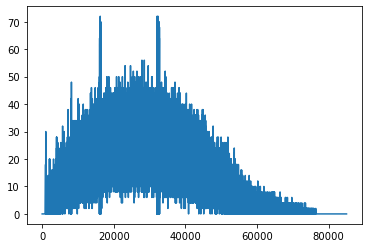

In [157]:
zeros = 85000
order = np.zeros(zeros)

with open('positions/noMIPS') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)
x = np.zeros(len(d))
y = np.zeros(len(d))
for i in range(len(d)):
    x[i] = float(d[i][1])
    y[i] = float(d[i][2])
    
def distance(a, b):
    X = b[0] - a[0]
    Y = b[1] - a[1]
    return np.sqrt(X*X + Y*Y)

i_max = 0
j_max = 0
p_max = 0.0



for i in range(N):
    for j in range(N):
        
        if i!=j:
            p = np.around(distance([x[i],y[i]], [x[j],y[j]]), 3)*1000
            if p_max<p: i_max = i; j_max=j
            p_max = p if p_max<p else p_max
            order[int(p)] += 1
            
plt.plot(order)

In [170]:
2**(1/6)*1000

1122.4620483093731

In [62]:
zeros = 85000
order = np.zeros(zeros)
nb = 2**(1/6)

with open('positions/noMIPS') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)
x = np.zeros(len(d))
y = np.zeros(len(d))
for i in range(len(d)):
    x[i] = float(d[i][1])
    y[i] = float(d[i][2])

def distance(a, b):
    X = b[0] - a[0]
    Y = b[1] - a[1]
    return np.sqrt(X*X + Y*Y)

def angle(inner, outer):
    X = outer[0] - inner[0]
    Y = outer[1] - inner[1]
    return np.arctan2(Y, X)


inv_N = 1/N
ϕ = 0

for i in range(N):
    nbors = np.zeros([20, 2])
    k = 0
    inner = [x[i], y[i]]
    nbors = 0
    for j in range(N):
        if i != j:
            p = np.around(distance([x[i],y[i]], [x[j],y[j]]), 3)
            if p < nb:
                outer = [x[j], y[j]]
                k += 1
                nbors += np.e**(6j*angle(inner, outer))
    if k!=0:
        ϕ += nbors/k
ψ = np.abs(ϕ/N)
print(ψ)

0.05049645661259861


In [180]:
ψ = np.abs(ϕ/N)
print(ψ)

0.07388676351861233


In [63]:
print(N)

1936


[-27.02047, 26.44426]
[27.20708, -27.36204]


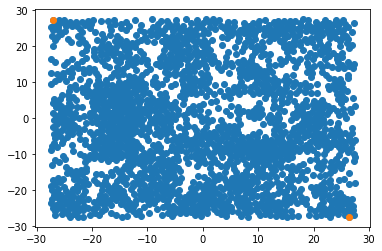

In [152]:
A = [x[i_max],x[j_max]]
B = [y[i_max],y[j_max]]
print(A)
print(B)
plt.scatter(x,y)
plt.scatter(A,B)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [66]:
with open('Simulated/Phi0.7Pe200/vmd_data.xyz') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)
N = int(d[0][0])
iters_d = int(len(d)/(N+2))
d_marks = np.zeros(iters_d)
for i in range(iters_d):
    if i==0: d_marks[i] = 2
    else: d_marks[i] = 2 + N + d_marks[i-1]


In [67]:
positions = np.zeros((50,N,2))
start_pt=450
for i in range(50):
    for j in range(N):
        k = int(d_marks[i+start_pt] + j)
        positions[i][j] = [float(d[k][1]), float(d[k][2])]

In [68]:
nb = 2**(1/6) #neighbouring distance limit

def distance(a, b):
    X = b[0] - a[0]
    Y = b[1] - a[1]
    return np.sqrt(X*X + Y*Y)

def angle(inner, outer):
    X = outer[0] - inner[0]
    Y = outer[1] - inner[1]
    return np.arctan2(Y, X)


inv_N = 1/N
ψ = 0

for i in range(50):
    ϕ = 0
    for j in range(N):
        l = 0
        tagged = [positions[i][j][0], positions[i][j][1]]
        neighbours = 0
        for k in range(N):
            if k!=j:
                p = distance(positions[i][j], positions[i][k])
                if p < nb:
                    outer = [positions[i][k][0], positions[i][k][1]]
                    l += 1
                    neighbours += np.e**(6j*angle(inner, outer))
        if l!=0:
            ϕ += neighbours/l
    ψ += np.abs(ϕ)

In [70]:
print(ψ/(50*N))

0.13189746961910828


In [71]:
f = np.asarray(d)

/home/shashank/Applications/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Old

In [ ]:
with open('Simulated/Phi0.7Pe200/vmd_data.xyz') as f:
    reader = csv.reader(f, delimiter=" ")
    d = list(reader)
N = int(d[0][0])
iters_d = int(len(d)/(N+2))
d_marks = np.zeros(iters_d)
for i in range(iters_d):
    if i==0: d_marks[i] = 2
    else: d_marks[i] = 2 + N + d_marks[i-1]


positions = np.zeros((50,N,2))
start_pt=450
for i in range(50):
    for j in range(N):
        k = int(d_marks[i+start_pt] + j)
        positions[i][j] = [float(d[k][1]), float(d[k][2])]

        
def distance(a, b):
    X = b[0] - a[0]
    Y = b[1] - a[1]
    return np.sqrt(X*X + Y*Y)

def angle(inner, outer):
    X = outer[0] - inner[0]
    Y = outer[1] - inner[1]
    return np.arctan2(Y, X)

inv_N = 1/N
ψ = 0
nb = 2**(1/6) #neighbouring distance limit


for i in range(50):
    ϕ = 0
    for j in range(N):
        l = 0
        tagged = [positions[i][j][0], positions[i][j][1]]
        neighbours = 0
        for k in range(N):
            if k!=j:
                p = distance(positions[i][j], positions[i][k])
                if p < nb:
                    outer = [positions[i][k][0], positions[i][k][1]]
                    l += 1
                    neighbours += np.e**(6j*angle(tagged, outer))
        if l!=0:
            ϕ += neighbours/l
    ψ += np.abs(ϕ)
    

print(ψ/(N*50))